In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [ ]:
data_df = pd.read_csv("/content/creditcard.csv")

In [ ]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data_df.shape

(7973, 31)

In [ ]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,7972.000000,7973.000000,7972.000000
mean,65.413540,4257.151261,0.003136
std,194.911169,3198.964299,0.055915
min,0.000000,0.000000,0.000000
25%,4.617500,1531.000000,0.000000
50%,15.950000,3635.000000,0.000000
75%,54.910000,6662.000000,0.000000
max,7712.430000,10981.000000,1.000000


In [ ]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data_df.isna().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


In [ ]:
null_columns = pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [ ]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.000000
1,V1,0,0.000000
2,V2,0,0.000000
3,V3,0,0.000000
4,V4,0,0.000000
5,V5,0,0.000000
6,V6,0,0.000000
7,V7,0,0.000000
8,V8,0,0.000000
9,V9,0,0.000000


In [ ]:
data_df['Class'].tail(10)

,Class
7963,0.0
7964,0.0
7965,0.0
7966,0.0
7967,0.0
7968,0.0
7969,0.0
7970,0.0
7971,0.0
7972,NaN


##Percentage of total not fraud transaction

In [ ]:
nfcount = 0
notfraud = data_df['Class']
for i in range(len(notfraud)):
  if notfraud[i] == 0:
    nfcount += 1

nfcount
per_nf = (nfcount/len(notfraud))*100
print("percentage of total not fraud transaction in the dataset:",per_nf)

percentage of total not fraud transaction in the dataset: 99.67389941051047


##Percentage of total fraud transaction

In [16]:
fcount = 0
Fraud = data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i] == 1:
    fcount += 1

fcount
per_f = (fcount/len(Fraud))*100
print("percentage of total fraud transaction in the dataset:",per_f)

percentage of total fraud transaction in the dataset: 0.3135582591245453


In [17]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = Fraud
plot_data['Genuine Transaction'] = notfraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
7968,0.0,0.0
7969,0.0,0.0
7970,0.0,0.0
7971,0.0,0.0


<Axes: title={'center': 'Bar for Fraud vs Genuine Transaction'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

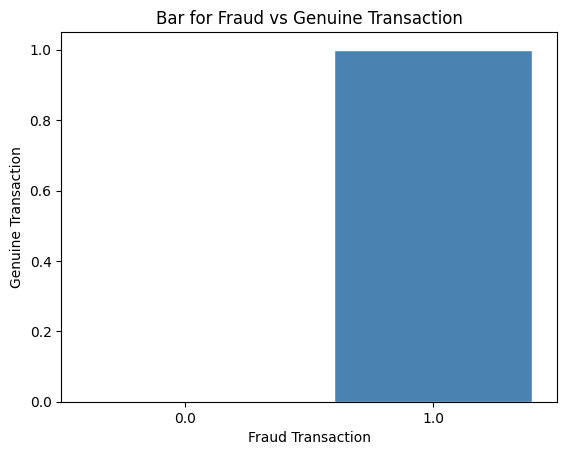

In [19]:
plt.title('Bar for Fraud vs Genuine Transaction')
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w', hue = 'Fraud Transaction', legend = False)

#As per the graph we can say the ratio of genuine transactions are higher than fraud transactions.

Text(0.5, 1.0, 'Time vs Amount')

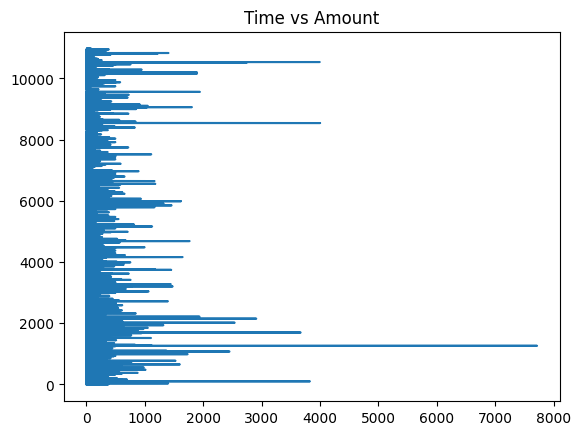

In [22]:
x = data_df['Amount']
y = data_df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

#In this graph we try to plot the relation between Time and the amount

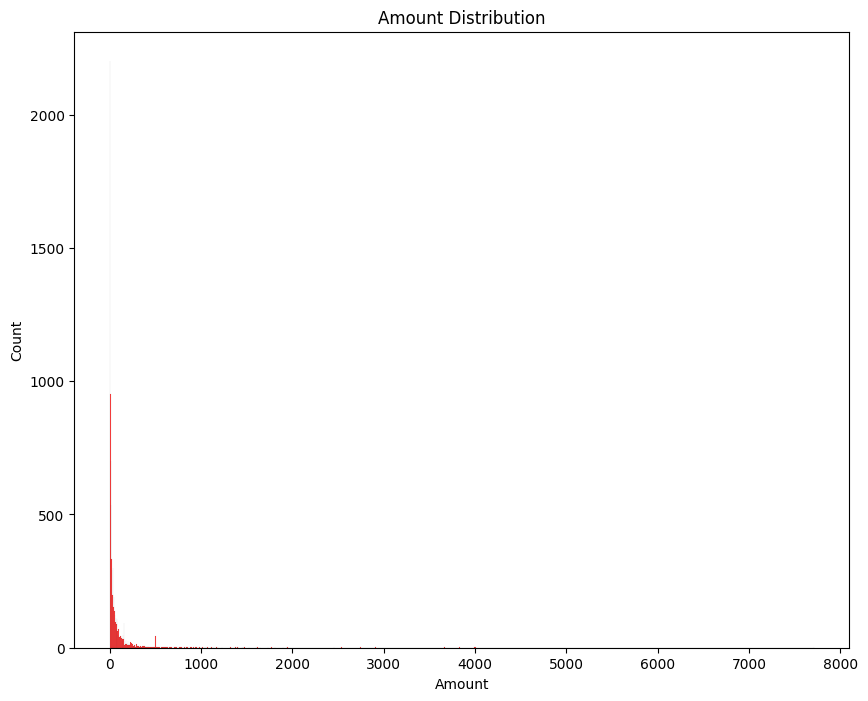

In [27]:
plt.figure(figsize = (10,8))
plt.title('Amount Distribution')

sns.histplot(data_df['Amount'], color = 'red');

#From this amount distribution curve it's shown that the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent.

##Outliers

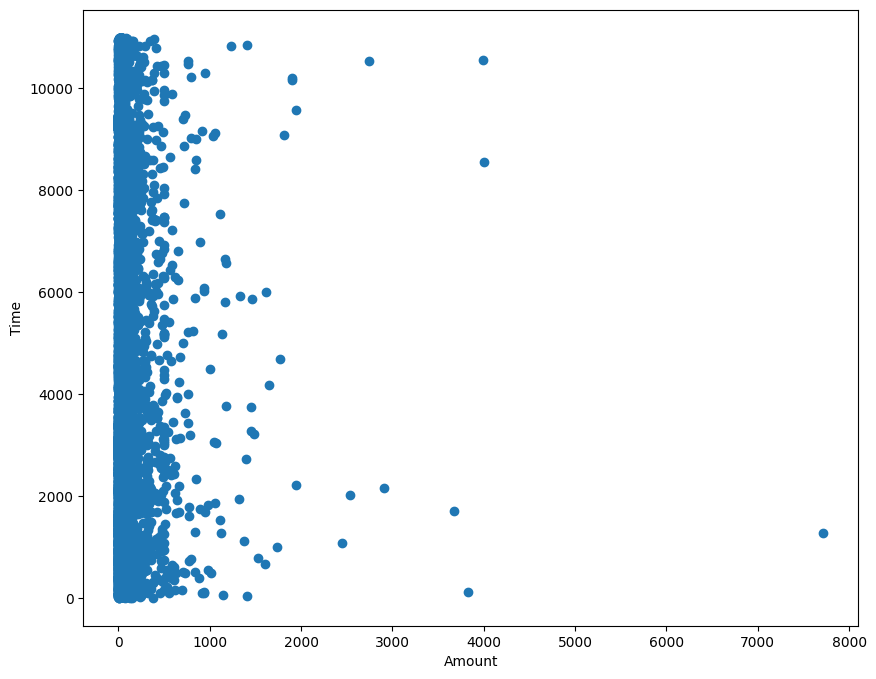

In [29]:
fig, ax = plt.subplots(figsize =(10, 8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

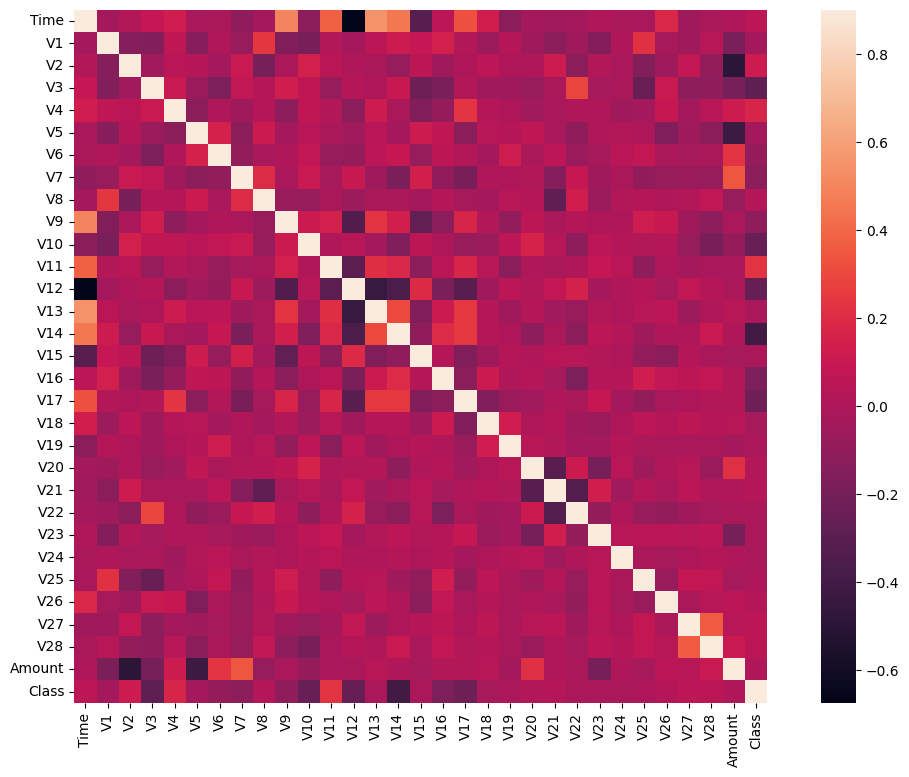

In [33]:
#Correlation matrix
correlation_metrics = data_df.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(correlation_metrics,vmax= .9, square = True)
plt.show()

# Correlation metrics help us to understand the core relation between two attributes.

**To start with modelling First we need to split the dataset,

80% - 80% of the data will use to train the model,

20% - 20% to validate the model**

In [39]:
data_df_cleaned = data_df.dropna()
x = data_df_cleaned.drop(['Class'], axis = 1) #drop the target variable
y = data_df_cleaned['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

In [38]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = logisticreg.predict(xtest)
accuracy = logisticreg.score(xtest, ytest)

##Confusion Matrix
--Positive(P) : Observation is positive (for ex: The transaction genuine)

--Negative(N) : Observation is not positive (for ex: The transaction is not genuine)

--True Positive(TP) : Observation is positive, and is predicted to be positive.

--False Negative(FN) : Observation is positive, but is predicted negative.

--True Negative(TN) : Observation is negative, and is predicted to be negative.

--False Positive(FP) : Observation is negative, but is predicted positive.

In [42]:
cm = metrics.confusion_matrix(ytest, y_pred)
cm

array([[1590,    2],
       [   0,    3]])

#Accuracy Calculation

In [43]:
print("Accuracy score of the logistic regression model:", accuracy*100,'%')

Accuracy score of the logistic regression model: 99.87460815047022 %
